In [25]:
#importing all dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import numpy as np
import pandas as pd

import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# create an engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
#reflect the tables
Base = automap_base()

Base.prepare(engine, reflect=True)

In [7]:
#display the classes
Base.classes.keys()

['measurement', 'station']

In [8]:
#save references for each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# create a session
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x118865a58>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

# Perform a query to retrieve the date and precipitation scores
precip = session.query(Measurement.date, func.avg(Measurement.prcp)).\
filter(Measurement.date > '2016-08-23').group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns = ['Date', 'Precipitation'])

# #set the index as the date and sort 
precip_df.set_index('Date', inplace=True)
precip_df.sort_index(inplace=True)

precip_df.head()


# Use Pandas Plotting with Matplotlib to plot the data


('2017-08-23',)


,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


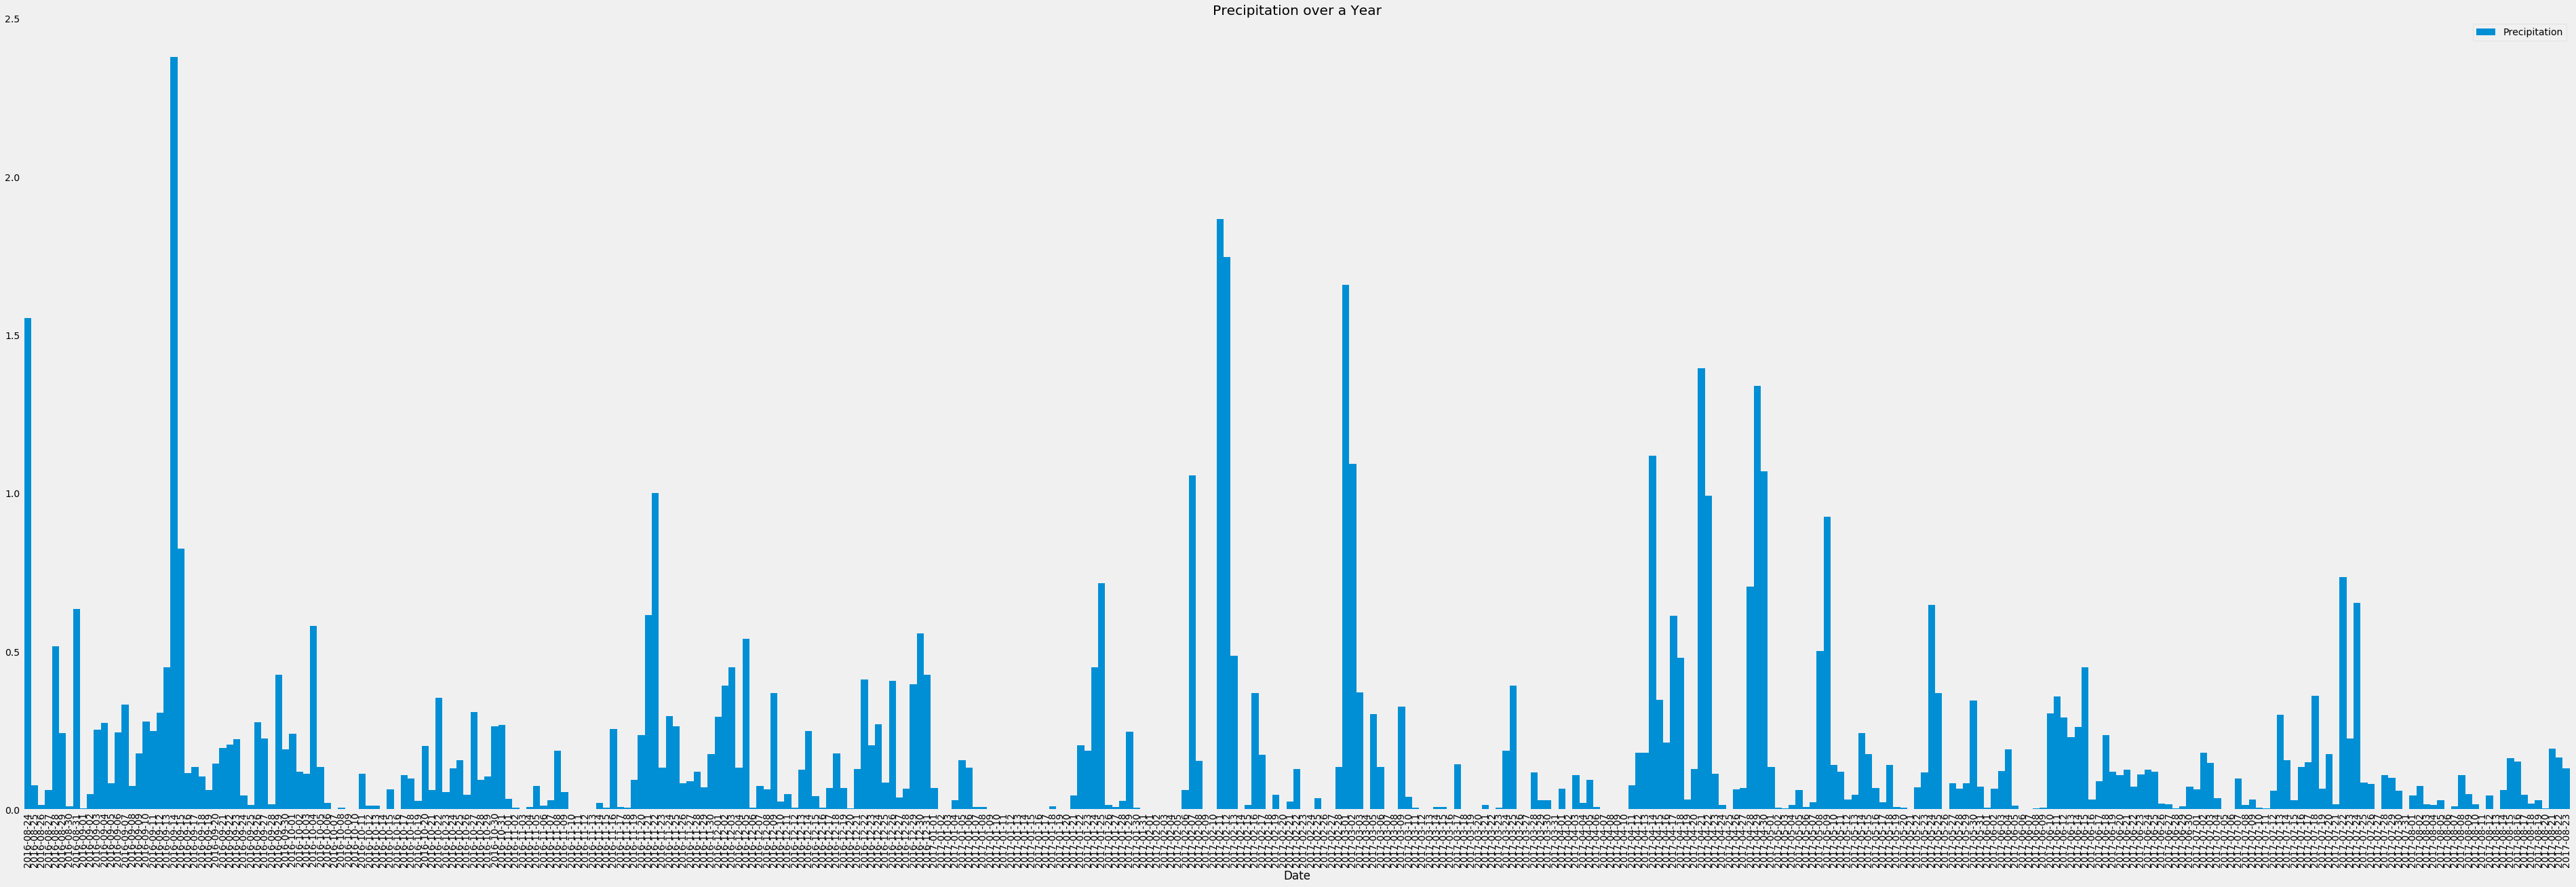

In [33]:
precip_df.plot(kind='bar', figsize=(60,20), title='Precipitation over a Year', width=1.0, grid=False)

plt.xticks(rotation=90)
plt.show()



In [16]:
# show summary statistics of the dataframe
precip_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [17]:
station_query = session.query(Station).first()
station_query.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x118ea36d8>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

In [18]:
stations = session.query(Measurement.station).group_by(Measurement.station).count()
print(f"There are {stations} weather stations")

There are 9 weather stations


In [20]:
# List the stations and the counts in descending order.

station_frequencies = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()

station_frequencies

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# low, high and average temperature for station with most number of measurments

low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f'The lowest recorded temperature was: {low_temp}')
print(f'The highest recorded temperature was: {high_temp}')
print(f'The average recorded temperature was: {avg_temp}')


The lowest recorded temperature was: [(54.0,)]
The highest recorded temperature was: [(85.0,)]
The average recorded temperature was: [(71.66378066378067,)]


In [22]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).\
filter(Measurement.station == 'USC00519281').first()
print(last_date)

('2017-08-18',)


In [23]:
#select the temperatures for the station with the most activity
station_temps = session.query(Measurement.tobs).\
filter_by(station = 'USC00519281').\
filter(Measurement.date > '2016-08-18').all()

station_temps

[(79.0),
 (81.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 

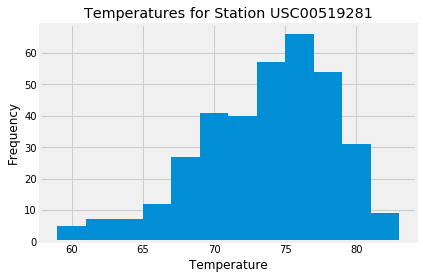

In [24]:
hist, bins = np.histogram(station_temps, bins=12)
width = bins[1] - bins[0]
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, width=width)

plt.title('Temperatures for Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()
